# Pytorch tests

In [16]:
# Specify the path to your video file
video_path_8min = 'videos/test/trimmed_vid_lec_03.mp4'
video_path_30min = '/Users/emilyng/Documents/CP3108B/SliTraNet/videos/test/ocw_11165_lecture06_2022sep28-1325_360p_16_9.mp4'

In [1]:
import torchvision.io.video as video
import torch.nn.functional as F

## kernel dies if I test on videos that are ~ 30 mins long

# Read the video and convert it into PyTorch tensors
frames_2, audio_2, info_2 = video.read_video(video_path_2, pts_unit="sec")

: 

: 

In [5]:
len(frames) # 14603 frames for 8 min video, took 2m 7.3s to run

14603

In [8]:
frames[4].shape # torch.Size([360, 640, 3])

torch.Size([360, 640, 3])

# Using Open CV to read videos

8 mins is also 14603 frames, and can apply torch.as_tensor() on frame to convert to tensor

In [37]:
import cv2
import torch
from moviepy.editor import VideoFileClip

def get_frames_as_tensor(path, library='MoviePy', frame_per_sec= None,):
    '''
    input: video path name
    output: list of video frames in tensor format
    '''
    frame_as_tensor = []

    if library=='MoviePy':
        # Create a VideoFileClip object from the input video
        video_clip = VideoFileClip(path) # returns video.io VideoFileClip 
        # default is sth like 30fps, can check using video_clip.fps
        if not frame_per_sec:
            frame_per_sec = video_clip.fps 

        for frame in video_clip.iter_frames(fps=frame_per_sec): 
            frame_as_tensor.append(frame) #torch.as_tensor(frame))
    
    elif library=='cv2': #cv2
        cap = cv2.VideoCapture(path)
        length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) 
        for i in range(length):
            cap.set(cv2.CAP_PROP_POS_FRAMES, i) # starts counting from 0
            ret, frame = cap.read()
            frame_as_tensor.append(torch.as_tensor(frame))
    
    else:
        raise ValueError("set library='MoviePy' or 'cv2' ")
    print(f"number of frames returned is {len(frame_as_tensor)}")
    return frame_as_tensor
video_path_8min = '../videos/test/trimmed_vid_lec_03.mp4'
lst_8min = get_frames_as_tensor(video_path_8min, 'MoviePy', 2)
# Release the video capture object when done
#cap.release()


number of frames returned is 974


In [38]:
lst_8min[0].shape

(360, 640, 3)

In [34]:
torch.flip(lst_8min[0], ).shape

RuntimeError: dim 0 appears multiple times in the list of dims

In [25]:
torch.rand(3,300,700).shape

torch.Size([3, 300, 700])

In [ ]:
video_frame_start = []
video_frame_end = []
static_slide_start = []
static_slide_end = []
in_between = []

file1 = open('results/test/resnet18_gray/trimmed_vid_lec_03_results.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    if count == 0:
        count += 1
        pass
    else:
        count += 1
        res = list(map(lambda x: int(x.strip()), line.split(',')))
        if res[0] == -1: # video frame
            video_frame_start.append(res[1])
            video_frame_end.append(res[2])
        else:
            static_slide_start.append(res[1])
            static_slide_end.append(res[2])

## video_frame -1 does not have values for last part of lecture, wheras static slide does
# theory: sattic slide detects changes but not past! Because this lecture cuts in and out.. 

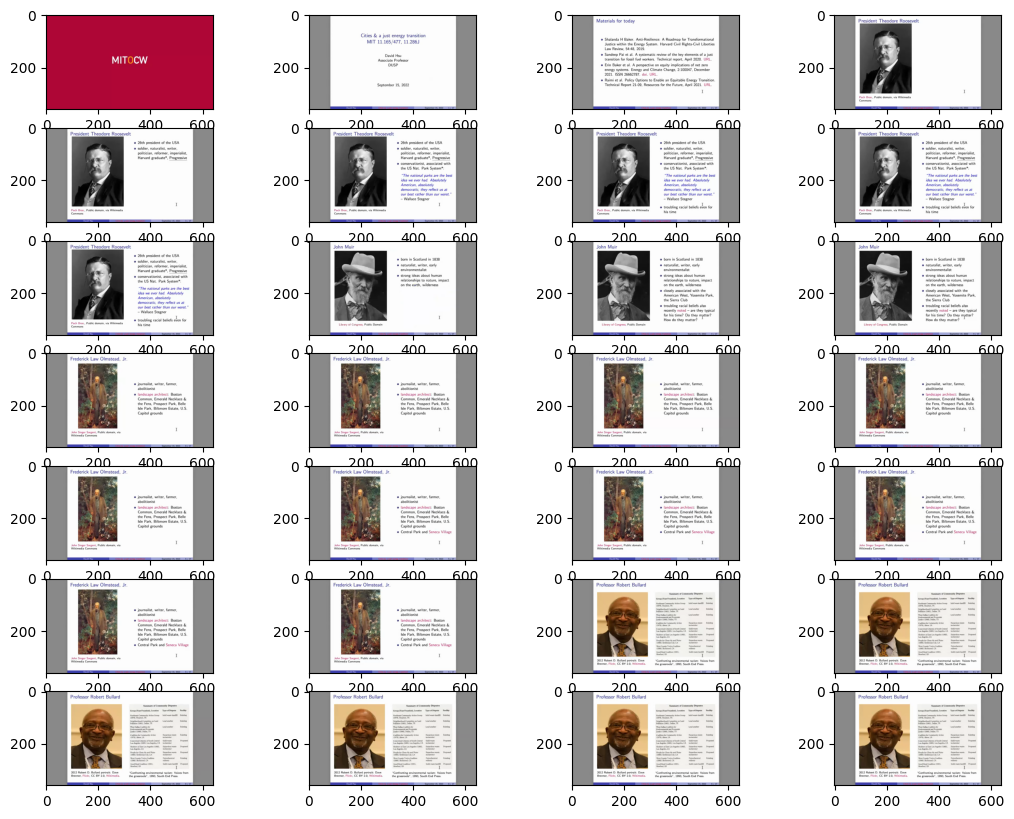

In [85]:
import torchvision.transforms as T
from PIL import Image
from matplotlib import pyplot as plt
# define a transform to convert a tensor to PIL image
transform = T.ToPILImage()
# convert the tensor to PIL image using above transform
img = transform(lst_8min[0])
# display the PIL image
#img.show()
indx = [28, 70, 112, 208, 277, 361, 395,494, 514, 611, 642, 661, 673, 709, 847, 892,920,948,960]
neg_1_indx = [1,49,89,137,242,299,581,625] # this dont mean much

N = len(static_slide_start)
fig, axes = plt.subplots(round(N//4),4, figsize=(13,10))
for i,ax in enumerate(axes.flat):
    ax.imshow(lst_8min[static_slide_start[i]])
plt.show()

In [56]:
lst_8min[-1]

array([[[110, 105, 107],
        [110, 105, 107],
        [110, 105, 107],
        ...,
        [ 90,  88,  89],
        [ 90,  88,  89],
        [ 90,  88,  89]],

       [[110, 105, 107],
        [110, 105, 107],
        [110, 105, 107],
        ...,
        [ 90,  88,  89],
        [ 90,  88,  89],
        [ 90,  88,  89]],

       [[110, 105, 107],
        [110, 105, 107],
        [110, 105, 107],
        ...,
        [ 90,  88,  89],
        [ 90,  88,  89],
        [ 90,  88,  89]],

       ...,

       [[  9,   6,   8],
        [  5,   3,   4],
        [ 16,  13,  15],
        ...,
        [ 47,  42,  44],
        [ 47,  42,  44],
        [ 47,  42,  44]],

       [[ 18,  16,  17],
        [ 22,  19,  20],
        [ 11,   9,  10],
        ...,
        [ 47,  42,  44],
        [ 47,  42,  44],
        [ 47,  42,  44]],

       [[  8,   5,   6],
        [ 19,  17,  18],
        [ 10,   8,   9],
        ...,
        [ 47,  42,  44],
        [ 47,  42,  44],
        [ 47,  42,  44]]

In [18]:
import numpy as np
cv2.imwrite('/Users/emilyng/Documents/CP3108B/moviepy_trimmed_static_slide_5_361.jpg', np.array(lst_8min[360]))

True

In [6]:
lst_30min[0]

tensor([[[ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162],
         ...,
         [ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162]],

        [[ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162],
         ...,
         [ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162]],

        [[ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162],
         ...,
         [ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162]],

        ...,

        [[ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162],
         ...,
         [ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162]],

        [[ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162],
         ...,
         [ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162]],

        [[ 54,   0, 162],
         [ 54,   0, 162],
         [ 54,   0, 162],
         ...,
         [ 54,   0, 162],
        

In [43]:
# to write array to jpg and display
cap.set(cv2.CAP_PROP_POS_FRAMES, 64355)
ret, frame = cap.read()
cv2.imwrite('/Users/emilyng/Documents/CP3108B/moviepy_trimmed_frame_49.jpg', frame)

True

# Using MoviePy

In [10]:
import torch
import torchvision.transforms as transforms
from moviepy.editor import VideoFileClip

# Create a VideoFileClip object from the input video
video_clip = VideoFileClip(video_path_30min) # returns video.io VideoFileClip # 30 fps
print(video_clip.fps)
frame_as_tensor = []
for frame in video_clip.iter_frames(fps=10):  # instead of video_clip.fps
    frame_as_tensor.append(torch.as_tensor(frame))

30.0


In [12]:
len(frame_as_tensor)

21452

: 

In [11]:
frame_as_tensor[0].shape

torch.Size([360, 640, 3])

In [6]:
frame_as_tensor_3fps = []
for frame in video_clip.iter_frames(fps=3):
    frame_as_tensor_3fps.append(torch.as_tensor(frame))

In [7]:
len(frame_as_tensor_3fps)

1461

In [ ]:
list(video_clip.iter_frames(fps=video_clip.fps))

In [11]:
video_clip.fps # 30 fps

30.0

In [12]:
30 * 8

240

In [14]:

# Initialize an empty list to store the PyTorch tensors
frames_as_tensors = []

# Define a transformation to convert frames into tensors
transform = transforms.ToTensor()

# Iterate through the frames in the video
for frame in video_clip.iter_frames(fps=video_clip.fps):
    # Convert the frame to a PyTorch tensor and append it to the list
    frame_tensor = transform(frame)
    frames_as_tensors.append(frame_tensor)

# Convert the list of tensors to a PyTorch tensor
frames_as_tensors = torch.stack(frames_as_tensors)

# 'frames_as_tensors' now contains all the frames as PyTorch tensors
# You can process, analyze, or use these tensors for your specific task

: 

: 

# Pytorch changing width & height

In [ ]:

# Desired width and height
desired_width = 640
desired_height = 480
# Resize each frame to the desired dimensions
resized_frames = [F.interpolate(frame.permute(2, 0, 1).unsqueeze(0), size=(desired_height, desired_width), mode="bilinear", align_corners=False).squeeze(0).permute(1, 2, 0) for frame in frames]


In [7]:
import torch
torch.cuda.is_available()

False

In [3]:
import torch
torch.set_default_device("mps")
tnsr = torch.tensor([1, 2, 3])
tnsr.get_device()

0

In [8]:
new = tnsr.to('cpu')
new.get_device()
new = new.to('mps')
new.get_device()

0

In [12]:
a = 'asf'
print(int(a))

ValueError: invalid literal for int() with base 10: 'asf'

In [13]:
try:
    a = 'asf'
    print(int(a))
except ValueError as err:
    if str(err) == "invalid literal for int() with base 10: 'abcde'":
            a = 123
            print(int(a))
    else:
         print(a)

asf


In [ ]:
except RuntimeError as err:
    if str(err) == 'Conv3D is not supported on MPS':
        x = x.to('cpu')
    elif str(err) == 'Placeholder storage has not been allocated on MPS device!':
        x = x.to('cpu')